In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

**Importing DataSet**

In [ ]:
from pandas import read_csv

In [ ]:
path=("/content/drive/MyDrive/Colab Notebooks/Data_Science_Project/census.csv")
data=read_csv(path)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Set to DataFrame**

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**No of Rows and columns**

In [ ]:
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 48842
Number of Columns: 15


**Checking for all the unique values against the attributes**

In [ ]:
for i, col in enumerate(df.columns):
  print(df.columns[i], '::\n', df[str(col)].unique(), '\n\n')

age ::
 [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 


workclass ::
 ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 


fnlwgt ::
 [226802  89814 336951 ... 129912 255835 257302] 


education ::
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 


education-num ::
 [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 


marital-status ::
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 


occupation ::
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-su

**Data Summarization before pre processing**

In [ ]:
description = df.describe()
print(description)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


**Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**special characters**

In [ ]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**?  to Null Value Conversion**

In [ ]:
df.replace("?", np.nan, inplace = True)

**Null Values**

In [ ]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

**Dropping Null Values**

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
df['income_num']=df['income'].map({'<=50K':0, '>50K':1})

In [ ]:
below_50k=(df.income_num == 0).sum()
print(below_50k)

34014


In [ ]:
above_50k=(df.income_num == 1).sum()
print(above_50k)

11208


# **Visualization**

**average working hour per country with income**

In [ ]:
pd.crosstab(df['native-country'], df['income'], 
           values=df['hours-per-week'], aggfunc=np.mean)

income,<=50K,>50K
native-country,,
Cambodia,41.294118,43.888889
Canada,38.475728,46.933333
China,37.753247,42.027778
Columbia,39.538462,56.250000
Cuba,39.919192,42.852941
Dominican-Republic,41.717391,42.800000
Ecuador,39.081081,47.833333
El-Salvador,36.014706,43.454545
England,40.722222,46.297872


**Checking for the class imbalance of the Target Variable**

Text(0, 0.5, 'Count')

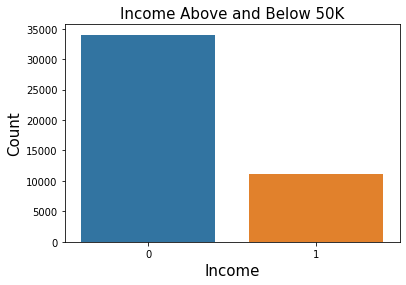

In [ ]:
sns.countplot(df.income_num)
df.income_num.value_counts()
plt.title('Income Above and Below 50K',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Count',fontsize=15)

**Occupation vs Income**

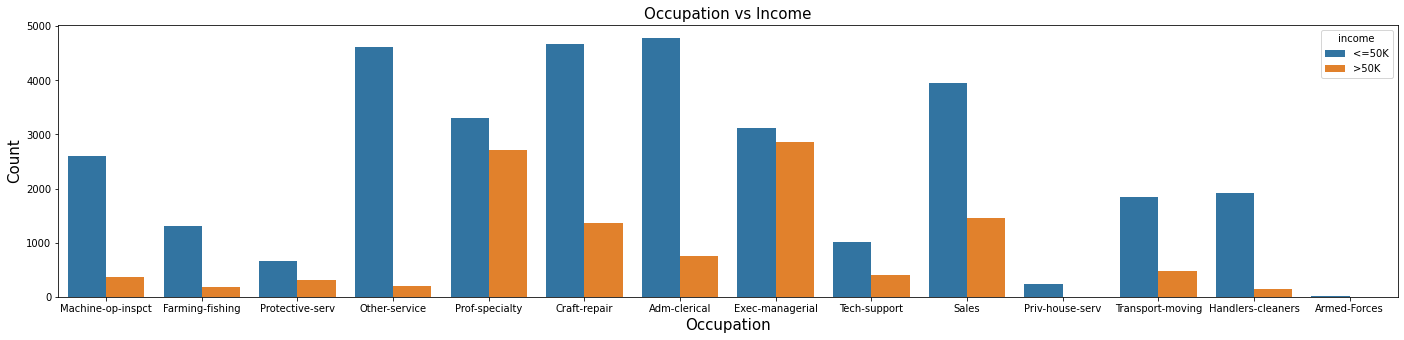

In [ ]:
occupation, axes = plt.subplots(1,1,figsize=(24,5))
sns.countplot(data=df,x='occupation',hue='income')
plt.title('Occupation vs Income',fontsize=15)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Workclass vs Income**

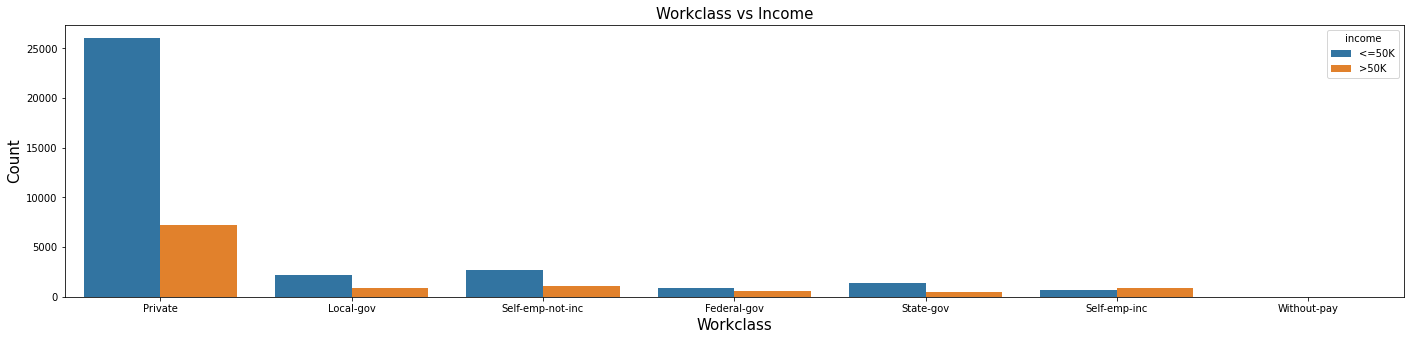

In [ ]:
occupation, axes = plt.subplots(1,1,figsize=(24,5))
sns.countplot(data=df,x='workclass',hue='income')
plt.title('Workclass vs Income',fontsize=15)
plt.xlabel('Workclass',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Relation vs Income**

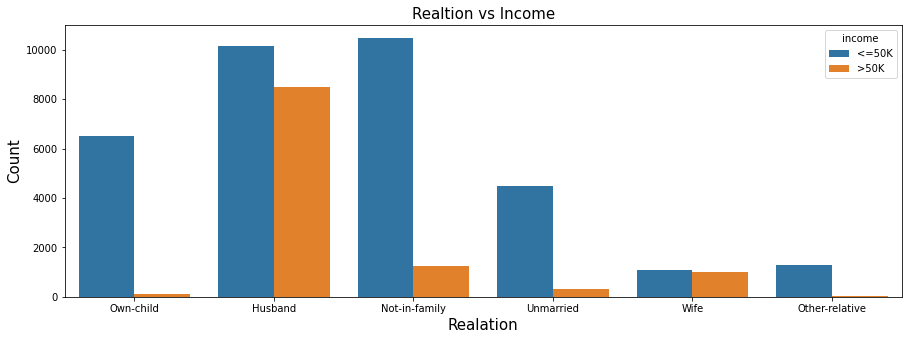

In [ ]:
realtion, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=df,x='relationship',hue='income')
plt.title('Realtion vs Income',fontsize=15)
plt.xlabel('Realation',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Education Vs Income**

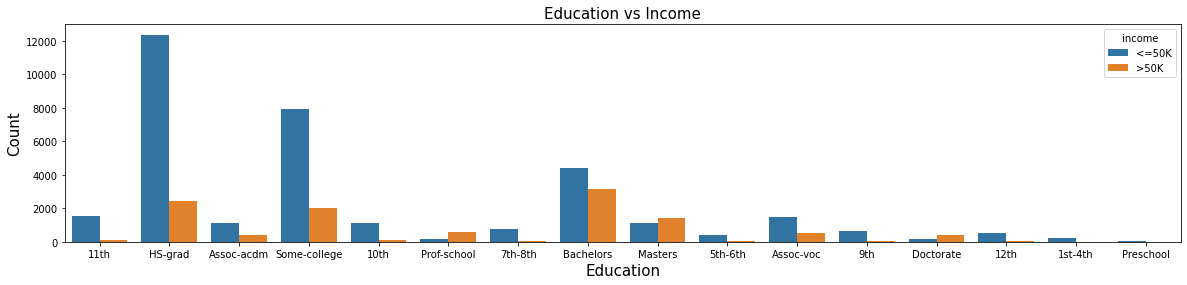

In [ ]:
education, axes = plt.subplots(1,1,figsize=(20,4))
sns.countplot(data=df,x='education',hue='income')
plt.title('Education vs Income',fontsize=15)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Sex vs Income**

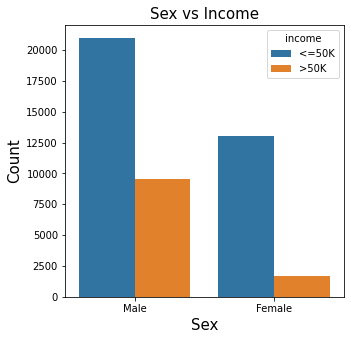

In [ ]:
sex, axes = plt.subplots(1,1,figsize=(5,5))
sns.countplot(data=df,x='sex',hue='income')
plt.title('Sex vs Income',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Race vs Income**

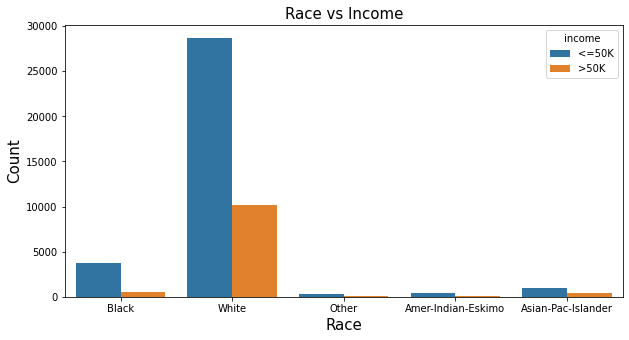

In [ ]:
race, axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(data=df,x='race',hue='income')
plt.title('Race vs Income',fontsize=15)
plt.xlabel('Race',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Percentage of Race**

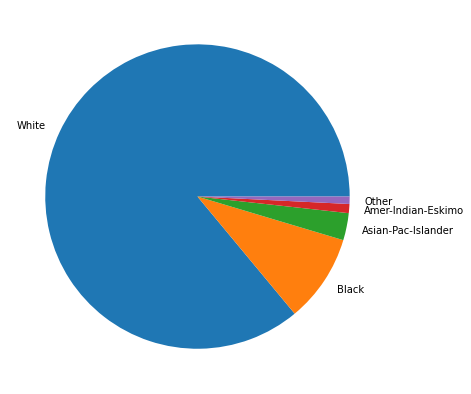

In [ ]:
label=df.race.value_counts().index
count=df.race.value_counts().values
plt.figure(1, figsize=(7,7))
plt.pie(count,labels=label)
plt.show()

**Percentage of Sex**

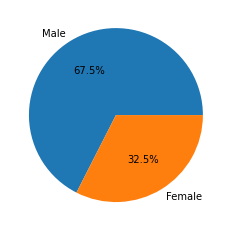

In [ ]:
label=df.sex.value_counts().index
count=df.sex.value_counts().values
plt.figure(1, figsize=(4,4))
plt.pie(count,labels=label,autopct='%1.1f%%')
plt.show()

**Age Distribution**

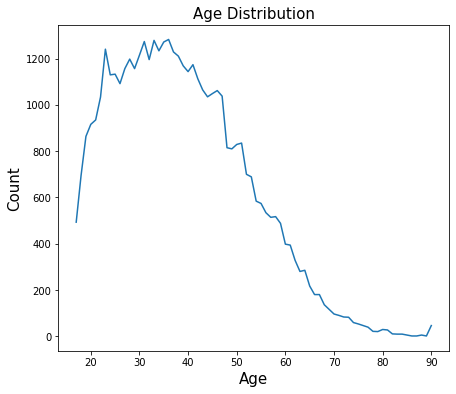

In [ ]:
#Height and Width
size = plt.figure()
size.set_figwidth(7)
size.set_figheight(6)

plt.title("Age Distribution",fontdict={"fontname":"monospace'","fontsize":15})
plt.xlabel("Age",fontdict={"fontname":"monospace'","fontsize":15})
plt.ylabel("Count",fontdict={"fontname":"monospace'","fontsize":15})

#Show Plot
df['age'].value_counts().sort_index().plot.line()

**Hours Per Week Distribution**

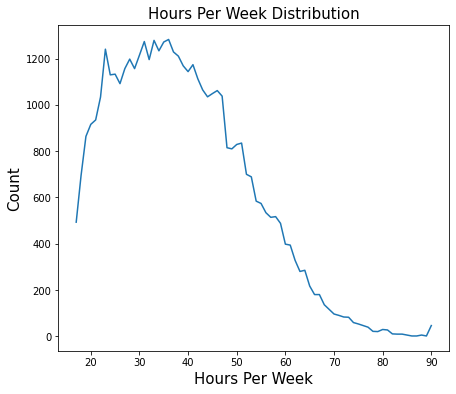

In [ ]:
#Height and Width
size = plt.figure()
size.set_figwidth(7)
size.set_figheight(6)

plt.title("Hours Per Week Distribution",fontdict={"fontname":"monospace'","fontsize":15})
plt.xlabel("Hours Per Week",fontdict={"fontname":"monospace'","fontsize":15})
plt.ylabel("Count",fontdict={"fontname":"monospace'","fontsize":15})

#Show Plot
df['age'].value_counts().sort_index().plot.line()

**Capital Loss vs Count**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e9ff670a0>],
      dtype=object)

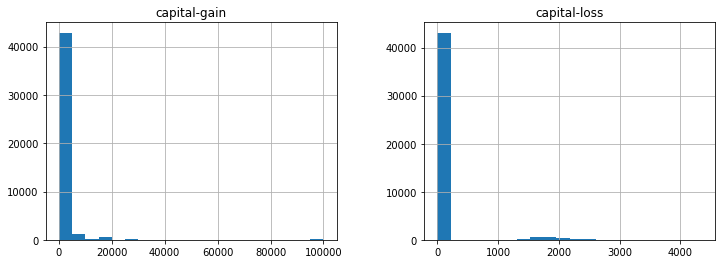

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
df.hist('capital-gain', bins=20, ax=axes[0])
df.hist('capital-loss', bins=20, ax=axes[1])

**Scatter Plot with Repect all Columns**

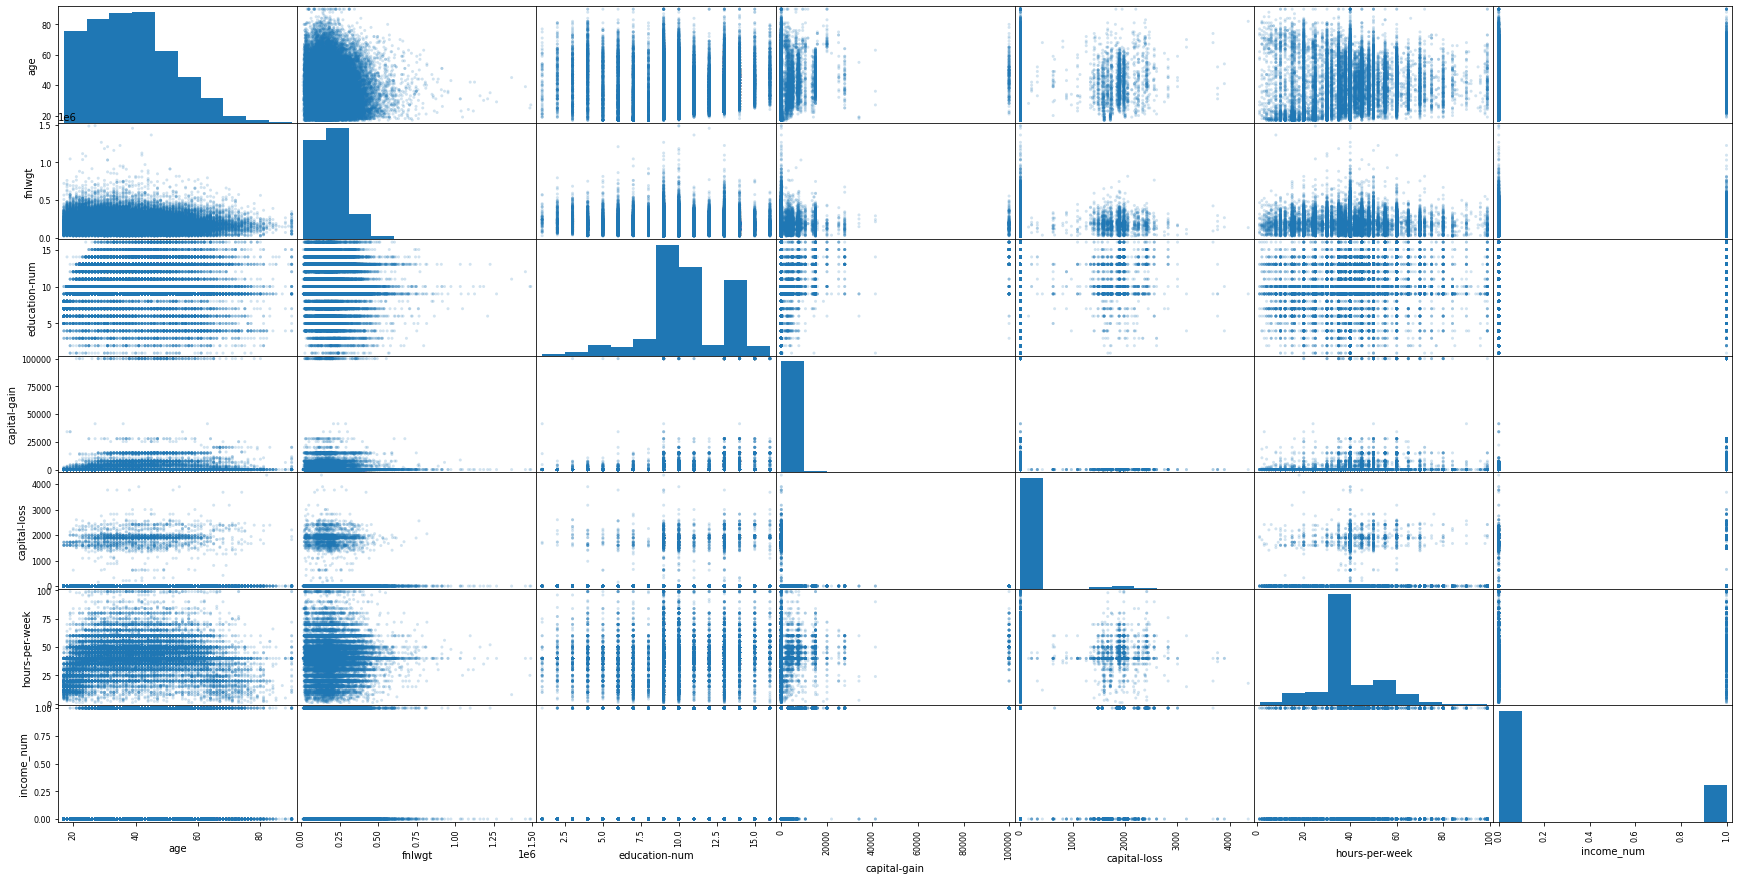

In [ ]:
pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(30,15))
plt.show()

**HeatMap Matrix**

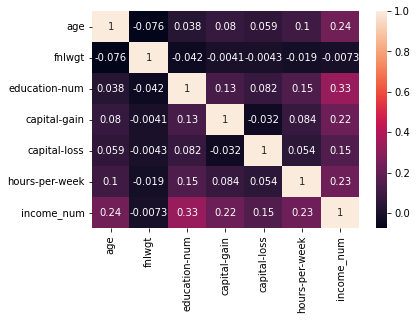

In [ ]:
sns.heatmap(df.corr(), annot=True)

# **Data Preparation**

In [ ]:
df=df.drop(['income','fnlwgt'], axis = 1)


**Text to Int Conversion**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["workclass"]=le.fit_transform(df["workclass"])
df["education"]=le.fit_transform(df["education"])
df["education-num"]=le.fit_transform(df["education-num"])
df["marital-status"]=le.fit_transform(df["marital-status"])
df["occupation"]=le.fit_transform(df["occupation"])
df["race"]=le.fit_transform(df["race"])
df["sex"]=le.fit_transform(df["sex"])
df["native-country"]=le.fit_transform(df["native-country"])
df["relationship"]=le.fit_transform(df["relationship"])
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_num
0,25,2,1,6,4,6,3,2,1,0,0,40,38,0
1,38,2,11,8,2,4,0,4,1,0,0,50,38,0
2,28,1,7,11,2,10,0,4,1,0,0,40,38,1
3,44,2,15,9,2,6,0,2,1,7688,0,40,38,1
5,34,2,0,5,4,7,1,4,1,0,0,30,38,0


**Discretazation**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df = kbins.fit_transform(df)

In [ ]:
df=pd.DataFrame(df)
standard_description = df.describe()
print(standard_description)

                 0             1             2             3             4   \
count  45222.000000  45222.000000  45222.000000  45222.000000  45222.000000   
mean       2.460263      3.312193      6.455354      5.841073      3.899120   
std        1.816376      1.565311      2.386159      1.715153      2.280014   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      3.000000      6.000000      5.000000      3.000000   
50%        2.000000      3.000000      7.000000      6.000000      3.000000   
75%        4.000000      3.000000      8.000000      8.000000      6.000000   
max        9.000000      9.000000      9.000000      9.000000      9.000000   

                 5             6             7             8             9   \
count  45222.000000  45222.000000  45222.000000  45222.000000  45222.000000   
mean       4.105214      2.779156      8.322144      6.075428      0.067534   
std        2.931010      3.095987      1.805195    

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,3.0,0.0,4.0,6.0,4.0,6.0,5.0,9.0,0.0,0.0,3.0,9.0,0.0
1,2.0,3.0,7.0,5.0,3.0,3.0,0.0,9.0,9.0,0.0,0.0,5.0,9.0,0.0
2,1.0,1.0,4.0,7.0,3.0,7.0,0.0,9.0,9.0,0.0,0.0,3.0,9.0,9.0
3,3.0,3.0,9.0,6.0,3.0,4.0,0.0,5.0,9.0,0.0,0.0,3.0,9.0,9.0
4,2.0,3.0,0.0,3.0,6.0,5.0,2.0,9.0,9.0,0.0,0.0,2.0,9.0,0.0


**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
df=scalar.fit_transform(df)

In [ ]:
X=df[:,0:13]
Y=df[:,13]

In [ ]:
df=pd.DataFrame(df)
scalar_description = df.describe()
print(scalar_description)

                 0             1             2             3             4   \
count  45222.000000  45222.000000  45222.000000  45222.000000  45222.000000   
mean       0.273363      0.368021      0.717262      0.649008      0.433236   
std        0.201820      0.173923      0.265129      0.190573      0.253335   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.111111      0.333333      0.666667      0.555556      0.333333   
50%        0.222222      0.333333      0.777778      0.666667      0.333333   
75%        0.444444      0.333333      0.888889      0.888889      0.666667   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 5             6             7             8             9   \
count  45222.000000  45222.000000  45222.000000  45222.000000  45222.000000   
mean       0.456135      0.308795      0.924683      0.675048      0.007504   
std        0.325668      0.343999      0.200577    

**Data Summarization**

In [ ]:
description = df.describe()
print(description)

                 0             1             2             3             4   \
count  45222.000000  45222.000000  45222.000000  45222.000000  45222.000000   
mean       0.273363      0.368021      0.717262      0.649008      0.433236   
std        0.201820      0.173923      0.265129      0.190573      0.253335   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.111111      0.333333      0.666667      0.555556      0.333333   
50%        0.222222      0.333333      0.777778      0.666667      0.333333   
75%        0.444444      0.333333      0.888889      0.888889      0.666667   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 5             6             7             8             9   \
count  45222.000000  45222.000000  45222.000000  45222.000000  45222.000000   
mean       0.456135      0.308795      0.924683      0.675048      0.007504   
std        0.325668      0.343999      0.200577    

# **Test_Train**

In [ ]:
x=df.drop([13],axis=1)
y=df[13]

**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

**Data Splitting**

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=0,learning_rate=0.2,n_estimators=200)
model.fit(X_train, y_train)
pred_y=model.predict(X_test)
knn_accuracy = (model.score(X_test,y_test)*100)
print(f'The Accuracy of the Model is {knn_accuracy}')

The Accuracy of the Model is 84.5771144278607
